# Binary Image Classifier in CNN

## In this loss and accuracy good but predicting is not good.. so that, we move in LeNet

In [2]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [4]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu')) # 32-> is a kernal/filter. (3,3)->Size of each kernal. (64,64,3)->3 dimensional 64 means dimensional(size of the ).AND 3 means RGB

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))

classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [5]:
# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
train_datagen

In [6]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen

In [7]:
training_set = train_datagen.flow_from_directory('E:/Parent', target_size = (64, 64),
                                                 batch_size=32,
                                                 class_mode='binary')
training_set

Found 20 images belonging to 2 classes.


In [8]:
test_set = test_datagen.flow_from_directory('E:/Parent',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')
test_set

Found 20 images belonging to 2 classes.


In [9]:
model = classifier.fit_generator(training_set,
                         steps_per_epoch = 500,      
                         epochs = 1,
                         validation_data = test_set,    
                         validation_steps = 100)


Epoch 1/1
500/500 [==============================] - 1405s 3s/step - loss: 0.0156 - accuracy: 0.9947 - val_loss: 6.1338e-07 - val_accuracy: 1.0000


In [10]:
classifier.save("Simple CNN Binary Image.h5")
print("Saved model to disk")

Saved model to disk


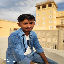

In [19]:
# Part 3 - Making new predictions

import numpy as np
from keras.preprocessing import image
test_image = image.load_img(r'C:\Users\Abhishek Negi\Desktop\Pic\IMG-20190620-WA0044.jpg', target_size = (64, 64))
test_image

In [20]:
test_image = image.img_to_array(test_image)
test_image

array([[[175., 189., 202.],
        [174., 188., 201.],
        [171., 185., 198.],
        ...,
        [202., 204., 203.],
        [192., 195., 200.],
        [182., 189., 197.]],

       [[176., 188., 202.],
        [172., 185., 201.],
        [171., 185., 198.],
        ...,
        [185., 189., 192.],
        [178., 187., 196.],
        [175., 185., 194.]],

       [[173., 187., 200.],
        [172., 184., 198.],
        [168., 181., 197.],
        ...,
        [155., 172., 190.],
        [135., 159., 183.],
        [134., 160., 185.]],

       ...,

       [[194., 172., 135.],
        [192., 172., 137.],
        [183., 163., 128.],
        ...,
        [177., 162., 133.],
        [167., 153., 126.],
        [165., 151., 122.]],

       [[192., 172., 137.],
        [184., 161., 129.],
        [188., 165., 133.],
        ...,
        [176., 162., 133.],
        [170., 156., 129.],
        [178., 164., 135.]],

       [[180., 156., 118.],
        [177., 153., 109.],
        [175., 1

In [21]:
test_image = np.expand_dims(test_image, axis = 0)
test_image

array([[[[175., 189., 202.],
         [174., 188., 201.],
         [171., 185., 198.],
         ...,
         [202., 204., 203.],
         [192., 195., 200.],
         [182., 189., 197.]],

        [[176., 188., 202.],
         [172., 185., 201.],
         [171., 185., 198.],
         ...,
         [185., 189., 192.],
         [178., 187., 196.],
         [175., 185., 194.]],

        [[173., 187., 200.],
         [172., 184., 198.],
         [168., 181., 197.],
         ...,
         [155., 172., 190.],
         [135., 159., 183.],
         [134., 160., 185.]],

        ...,

        [[194., 172., 135.],
         [192., 172., 137.],
         [183., 163., 128.],
         ...,
         [177., 162., 133.],
         [167., 153., 126.],
         [165., 151., 122.]],

        [[192., 172., 137.],
         [184., 161., 129.],
         [188., 165., 133.],
         ...,
         [176., 162., 133.],
         [170., 156., 129.],
         [178., 164., 135.]],

        [[180., 156., 118.],
       

In [22]:
from keras.models import load_model
model=load_model('Simple CNN Binary Image.h5')
result= model.predict(test_image)
result

array([[1.]], dtype=float32)

In [23]:
training_set.class_indices

{'Abhishek Negi': 0, 'Dorami': 1}

In [24]:
if result[0][0] == 1:
    prediction = 'Dorami'
    print(prediction)
elif result[0][0]==0:
    prediction = 'Abhishek Negi'
    print(prediction)
else:
    print('Not Predicted')

Dorami


In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 30752)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               3936384   
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 129       
Total params: 3,937,409
Trainable params: 3,937,409
Non-trainable params: 0
_________________________________________________________________
